In [1]:
%time
# create random data
import csv
import random
import datetime
with open("data.csv",'w') as file:
    wr=csv.writer(file)
    wr.writerow(["日期","销量"])
    startDate=datetime.date(2017,1,1)
    for i in range(365):
        amount=300+i*5+random.randrange(100)
        wr.writerow([str(startDate),amount])
        startDate=startDate+datetime.timedelta(days=1)

In [26]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [35]:
res=pd.read_csv("data.csv")
res.head()

,日期,销量
0,2017-01-01,363
1,2017-01-02,308
2,2017-01-03,362
3,2017-01-04,408
4,2017-01-05,363


In [32]:
df = DataFrame(res)
df['date'] = pd.to_datetime(df['日期']) #将数据类型转换为日期类型
df = df.set_index('date') # 将date设置为index
df=df.drop(columns="日期", axis=1)
df

,销量
date,
2017-01-01,363
2017-01-02,308
2017-01-03,362
2017-01-04,408
2017-01-05,363
...,...
2017-12-27,2154
2017-12-28,2148
2017-12-29,2189


In [39]:
df2=df.resample('M').sum()
df2

,销量
date,
2017-01-31,13478
2017-02-28,16145
2017-03-31,22254
2017-04-30,26111
2017-05-31,31880
2017-06-30,35426
2017-07-31,41302
2017-08-31,46023
2017-09-30,49074


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(style="darkgrid",rc=rc)

(0.0, 364.0)

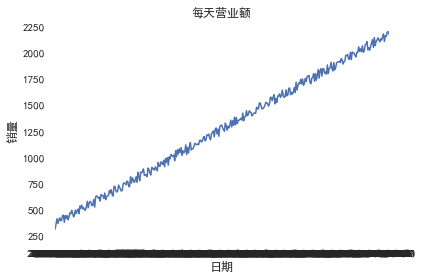

In [17]:
ax = sns.lineplot(
    x=df["日期"],
    y=df["销量"],
     markers=True,
    dashes=False,
)
ax.set_title("每天营业额")
# ax.set_ylim(0,)
ax.set_xlim(df['日期'].min(), df['日期'].max())

In [23]:
ax.get_figure().savefig('first.png',dpi=500)

/home/yjs/.conda/envs/py36_ml_dl/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yjs/.conda/envs/py36_ml_dl/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yjs/.conda/envs/py36_ml_dl/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27599 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yjs/.conda/envs/py36_ml_dl/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yjs/.conda/envs/py36_ml_dl/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33829 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yjs/.conda/envs/py36_ml_dl/li

In [49]:
df2.reset_index()
df2.head()

,销量
date,
2017-01-31,13478
2017-02-28,16145
2017-03-31,22254
2017-04-30,26111
2017-05-31,31880


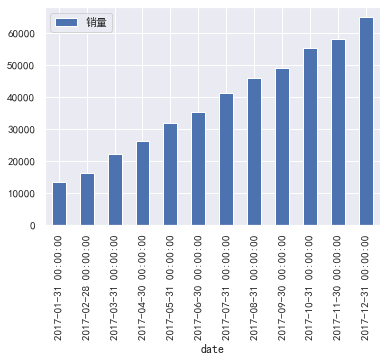

In [57]:
# sns.barplot(x="date", y="销量", data=df2)
ax2=df2.plot(kind="bar")
ax2
ax2.get_figure().savefig('second.png',dpi=500)

In [65]:
len(df2.index)

12

In [75]:
max_diff=0
for i in range(len(df2.index)-1):
    diff=abs(df2["销量"][df2.index[i]]-df2["销量"][df2.index[i+1]])
    max_diff=max(diff,max_diff)

with open("maxMouth.txt",'w') as file:
    file.write(str(max_diff))
max_diff

6619

In [89]:
df_q = df.set_index([df.index.quarter, df.index])
df_q.index.names = ['quarter', 'date']
quarter_df=df_q.sum(level='quarter')
quarter_df

,销量
quarter,
1,51877
2,93417
3,136399
4,178781


In [92]:
quarter_df.index

Int64Index([1, 2, 3, 4], dtype='int64', name='quarter')

In [118]:
quarter_df.iloc[0]["销量"]

51877

In [120]:

quarter_list=[quarter_df.iloc[i]["销量"] / quarter_df["销量"].sum() for i in range(4)]
quarter_list

[0.11265999817579277,
 0.20287138904693858,
 0.296214335662817,
 0.38825427711445165]

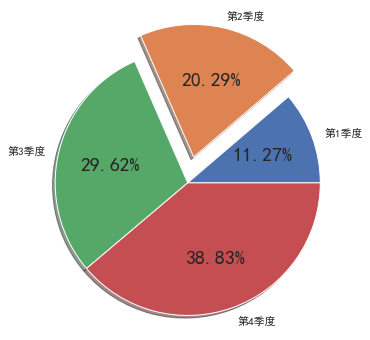

In [123]:
from matplotlib import rcParams

rcParams["font.size"]=20
plt.figure(figsize=(6,6))
_=plt.pie(quarter_list,labels=["第1季度","第2季度","第3季度","第4季度"],autopct="%0.2f%%",explode=[0,0.2,0,0],shadow=True)
_=plt.axis("equal")
plt.savefig('third.png',dpi=500)